# Avance Proyecto

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Dataset 1: Sea Level

d002 -> Tarakawa, Kiribati (1.3320m 172.01300)
d003 -> Baltra, Ecuador (-0.43700, -90.28500)
d004 -> Nauru, Nauru (-0.52800, 166.90500)
d011 -> Christmas, Kiribati (1.98500, -157.47700)
d013 -> Kanton, Kiribati (-2.81000, -171.71800)
d029 -> Kapingamarangi, Micronesia (1.09800, 154.77700) 
d030 -> Santa Cruz, Ecuador (-0.75500, -90.31300)
d091 -> La Libertad, Ecuador (-2.20000, -80.91700)
d092 -> Talara, Peru (-4.58200, -81.28200)
d400 -> Lombrum, Papua New Guinea (-2.03300, 147.36700)

In [2]:
# Merge dataframe de cada estacion

df = pd.read_csv('data/sea level center/d002.csv', names=['Year', 'Month', 'Day', 'd002'])
df.head()

df_names = ['d003', 'd004', 'd011', 'd013', 'd029', 'd030', 'd091', 'd092', 'd400']

for n in df_names:
    path = 'data/sea level center/{}.csv'.format(n)
    d_right = pd.read_csv(path, names=['Year', 'Month', 'Day', n])
    df = df.merge(d_right, how='outer', on=['Year', 'Month', 'Day'])

df.sort_values(by=['Year', 'Month', 'Day'], inplace=True)
df.reset_index(inplace=True, drop=True)


In [3]:
df # Dataframe de todas las estaciones

,Year,Month,Day,d002,d003,d004,d011,d013,d029,d030,d091,d092,d400
0,1949,9,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2166.0,NaN,NaN
1,1949,9,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2185.0,NaN,NaN
2,1949,9,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2092.0,NaN,NaN
3,1949,9,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2081.0,NaN,NaN
4,1949,9,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2130.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26230,2021,6,26,1692.0,1880.0,1507.0,NaN,1071.0,1029.0,1522.0,NaN,NaN,794.0
26231,2021,6,27,1672.0,1905.0,1473.0,NaN,1052.0,1014.0,1512.0,NaN,NaN,790.0
26232,2021,6,28,1658.0,1914.0,1460.0,NaN,1040.0,NaN,1509.0,NaN,NaN,802.0
26233,2021,6,29,1678.0,1922.0,1480.0,NaN,1072.0,NaN,1504.0,NaN,NaN,814.0


### Dataset 2 - Average Sea Surface Temperature

In [118]:
# Dataframe de 1997 

# Dataframe desde longitud 140 hasta 179.5
df_sst_1997 = pd.read_csv('https://coastwatch.pfeg.noaa.gov/erddap/griddap/erdHadISST.csv?sst%5B(1997-01-01T12:00:00Z):1:(1997-12-31T23:59:59Z)%5D%5B(5):1:(-5)%5D%5B(140):1:(179.5)%5D')

df_sst_1997.dropna(inplace=True)

# Dataframe desde longitud -179.5 hasta -80

df_sst2 = pd.read_csv('https://coastwatch.pfeg.noaa.gov/erddap/griddap/erdHadISST.csv?sst%5B(1997-01-01T12:00:00Z):1:(1997-12-31T23:59:59Z)%5D%5B(5):1:(-5)%5D%5B(-179.5):1:(-77)%5D')
df_sst2.dropna(inplace=True)

# Merge dataframes


df_sst_1997 = df_sst_1997.merge(df_sst2, how='outer', on=['time','latitude','longitude','sst'])

df_sst_1997.drop([0], inplace=True) #Primera fila es un header
df_sst_1997.reset_index(inplace=True, drop=True)

# Fixing data types
df_sst_1997['time'] = pd.to_datetime(df_sst_1997['time']) #Data type -> datetime
df_sst_1997['latitude'] = df_sst_1997['latitude'].astype(float)
df_sst_1997['longitude'] = df_sst_1997['longitude'].astype(float)
df_sst_1997['sst'] = df_sst_1997['sst'].astype(float)

df_sst_1997


,time,latitude,longitude,sst
0,1997-01-16 12:00:00+00:00,5.5,140.5,28.769217
1,1997-01-16 12:00:00+00:00,5.5,141.5,28.805550
2,1997-01-16 12:00:00+00:00,5.5,142.5,28.946290
3,1997-01-16 12:00:00+00:00,5.5,143.5,29.103340
4,1997-01-16 12:00:00+00:00,5.5,144.5,29.271656
...,...,...,...,...
20067,1998-01-16 12:00:00+00:00,-4.5,-85.5,28.673662
20068,1998-01-16 12:00:00+00:00,-4.5,-84.5,28.678600
20069,1998-01-16 12:00:00+00:00,-4.5,-83.5,28.560375
20070,1998-01-16 12:00:00+00:00,-4.5,-82.5,28.400507


In [119]:
# Dataframe de 2015

# Dataframe desde longitud 140 hasta 179.5
df_sst_2015 = pd.read_csv('https://coastwatch.pfeg.noaa.gov/erddap/griddap/erdHadISST.csv?sst%5B(2015-01-01T12:00:00Z):1:(2015-12-31T23:59:59Z)%5D%5B(5):1:(-5)%5D%5B(140):1:(179.5)%5D')

df_sst_2015.dropna(inplace=True)

# Dataframe desde longitud -179.5 hasta -80

df_sst2 = pd.read_csv('https://coastwatch.pfeg.noaa.gov/erddap/griddap/erdHadISST.csv?sst%5B(2015-01-01T12:00:00Z):1:(2015-12-31T23:59:59Z)%5D%5B(5):1:(-5)%5D%5B(-179.5):1:(-77)%5D')
df_sst2.dropna(inplace=True)

# Merge dataframes


df_sst_2015 = df_sst_2015.merge(df_sst2, how='outer', on=['time','latitude','longitude','sst'])

df_sst_2015.drop([0], inplace=True) #Primera fila es un header
df_sst_2015.reset_index(inplace=True, drop=True)

df_sst_2015['time'] = pd.to_datetime(df_sst_2015['time']) #Data type -> datetime
df_sst_2015['latitude'] = df_sst_2015['latitude'].astype(float)
df_sst_2015['longitude'] = df_sst_2015['longitude'].astype(float)
df_sst_2015['sst'] = df_sst_2015['sst'].astype(float)

df_sst_2015

,time,latitude,longitude,sst
0,2015-01-16 12:00:00+00:00,5.5,140.5,28.839882
1,2015-01-16 12:00:00+00:00,5.5,141.5,28.925926
2,2015-01-16 12:00:00+00:00,5.5,142.5,28.997150
3,2015-01-16 12:00:00+00:00,5.5,143.5,29.015670
4,2015-01-16 12:00:00+00:00,5.5,144.5,28.976440
...,...,...,...,...
20067,2016-01-16 12:00:00+00:00,-4.5,-85.5,26.835735
20068,2016-01-16 12:00:00+00:00,-4.5,-84.5,26.561320
20069,2016-01-16 12:00:00+00:00,-4.5,-83.5,26.238153
20070,2016-01-16 12:00:00+00:00,-4.5,-82.5,25.660004


## 1) Relacion entre periodo de 1970-1984 a 1984-2020

In [5]:
# Dataframe dividido por años a investigar

# Dataframe 1970 a 1984
df_70_84 = df.loc[(df['Year']>=1970) & (df['Year']<=1984) ]

# Dataframe 1985 - 2020
df_85_20 = df.loc[ (df['Year']>1984) & (df['Year']<= 2020) ]

In [6]:
# Manejo de valores nulos en dataframe 1970 - 1984

# Solo se analizará la estacion 011, 013, 029, 030, 091 porque no existen datos en las otras estaciones
df_70_84 = df_70_84[['Year','Month','Day', 'd011', 'd013','d029','d030','d091']]
df_70_84.reset_index(inplace=True, drop=True)

df_70_84

,Year,Month,Day,d011,d013,d029,d030,d091
0,1970,1,1,NaN,NaN,NaN,NaN,2242.0
1,1970,1,2,NaN,NaN,NaN,NaN,2232.0
2,1970,1,3,NaN,NaN,NaN,NaN,2210.0
3,1970,1,4,NaN,NaN,NaN,NaN,2197.0
4,1970,1,5,NaN,NaN,NaN,NaN,2194.0
...,...,...,...,...,...,...,...,...
5474,1984,12,27,637.0,1104.0,1063.0,1404.0,2381.0
5475,1984,12,28,624.0,1073.0,1068.0,1400.0,2357.0
5476,1984,12,29,645.0,1065.0,1074.0,1386.0,2341.0
5477,1984,12,30,646.0,1083.0,1077.0,1379.0,2356.0


In [7]:
# Manejo de valores nulos en dataframe 1985 - 2020

df_85_20 = df_85_20[['Year','Month','Day', 'd011', 'd013','d029','d030','d091']]

# Manejo de valores atipicos (-32767
df_85_20.replace(-32767, np.NaN, inplace=True)#Reemplazar por calores atipicos por  NaN


# Se ha reemplazado estos valores por el promedio anual
df_85_20['d011'] = df_85_20['d011'].fillna(df_85_20.groupby('Year')['d011'].transform('mean'))
df_85_20['d013'] = df_85_20['d013'].fillna(df_85_20.groupby('Year')['d013'].transform('mean'))
df_85_20['d029'] = df_85_20['d029'].fillna(df_85_20.groupby('Year')['d029'].transform('mean'))
df_85_20['d030'] = df_85_20['d030'].fillna(df_85_20.groupby('Year')['d030'].transform('mean'))
df_85_20['d091'] = df_85_20['d091'].fillna(df_85_20.groupby('Year')['d091'].transform('mean'))

df_85_20.reset_index(inplace=True, drop=True)

df_85_20

,Year,Month,Day,d011,d013,d029,d030,d091
0,1985,1,1,628.0,1061.0,1048.000000,1431.0,2340.0
1,1985,1,2,640.0,1056.0,1094.000000,1438.0,2331.0
2,1985,1,3,622.0,1046.0,1099.000000,1415.0,2299.0
3,1985,1,4,611.0,1035.0,1068.000000,1413.0,2299.0
4,1985,1,5,623.0,1021.0,1077.000000,1406.0,2279.0
...,...,...,...,...,...,...,...,...
13144,2020,12,27,607.0,1076.0,1077.953368,1479.0,2380.0
13145,2020,12,28,596.0,1068.0,1077.953368,1482.0,2378.0
13146,2020,12,29,610.0,1083.0,1077.953368,1502.0,2400.0
13147,2020,12,30,637.0,1091.0,1132.000000,1497.0,2420.0


### Visualizaciones

In [95]:
# Visualizacion de dataframe 1985 - 2020
df_p=df_85_20.dropna()
df_p = df_p[['Year','d011','d013', 'd029', 'd030', 'd091']].groupby('Year').mean()
df_p.reset_index(inplace=True)

df_p

,Year,d011,d013,d029,d030,d091
0,1985,693.638356,1039.522152,1023.859155,1402.147945,2372.041096
1,1986,741.400000,1025.328767,1009.590028,1453.970588,2423.232877
2,1987,724.084932,968.882192,872.174157,1514.115068,2484.435616
3,1988,536.887978,895.857923,959.311475,1375.232240,2380.412568
4,1989,654.123288,1009.539726,1036.232877,1424.126027,2419.249315
5,1990,724.419178,1086.556164,1010.071233,1454.145205,2394.032877
6,1991,744.669468,1086.827397,993.556164,1501.016438,2441.936986
7,1992,717.330579,1049.906336,883.073770,1516.872881,2478.811475
8,1993,700.731507,1058.632877,932.712329,1496.339726,2458.794521
9,1994,724.728767,1072.140884,996.205479,1466.539726,2448.427397


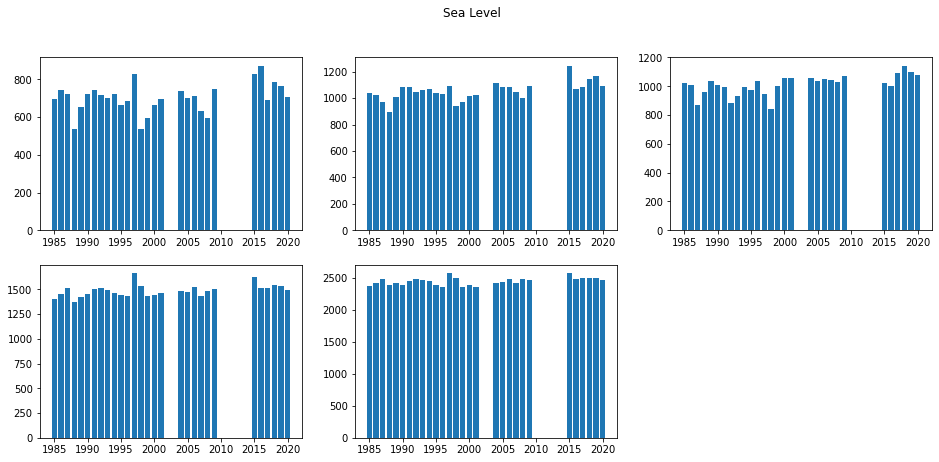

In [96]:
# Vista de nivel de mar anual por estacion

plt.figure(figsize=(16, 7))

plt.subplot(231)
plt.bar(df_p['Year'].values,df_p['d011'].values)

plt.subplot(232)
plt.bar(df_p['Year'].values,df_p['d013'].values)

plt.subplot(233)
plt.bar(df_p['Year'].values,df_p['d029'].values)

plt.subplot(234)
plt.bar(df_p['Year'].values,df_p['d030'].values)

plt.subplot(235)
plt.bar(df_p['Year'].values,df_p['d091'].values)

plt.suptitle('Sea Level')
plt.show()

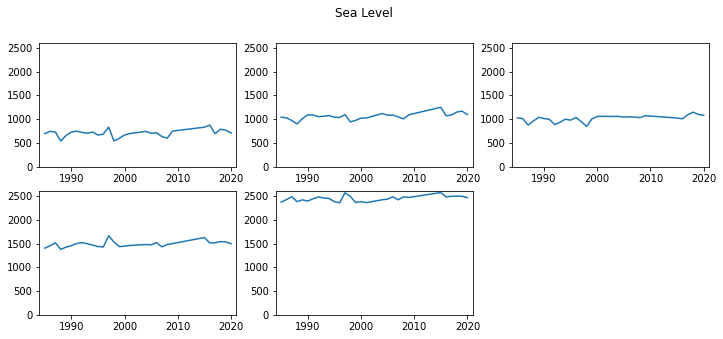

In [97]:
plt.figure(figsize=(12, 5))

plt.subplot(231)
plt.plot(df_p['Year'].values, df_p['d011'], label='011')
plt.axis([1984, 2021,0,2600])

plt.subplot(232)
plt.plot(df_p['Year'].values, df_p['d013'], label='013')
plt.axis([1984, 2021,0,2600])


plt.subplot(233)
plt.plot(df_p['Year'].values, df_p['d029'], label='029')
plt.axis([1984, 2021,0,2600])
# 
plt.subplot(234)
plt.plot(df_p['Year'].values, df_p['d030'], label='030')
plt.axis([1984, 2021,0,2600])


plt.subplot(235)
plt.plot(df_p['Year'].values, df_p['d091'], label='091')
plt.axis([1984, 2021,0,2600])

#label the figure
plt.suptitle('Sea Level')
plt.show()

In [130]:
# Nivel del mar del año 2015

df_2015 = df_85_20.loc[df_85_20['Year'] == 2015]
df_2015 = df_2015[['Month','d011','d013', 'd029', 'd030', 'd091']].groupby('Month').mean()
df_2015.reset_index(inplace=True)

df_2015

,Month,d011,d013,d029,d030,d091
0,1,805.451613,1247.111111,1110.483871,1516.903226,2477.709677
1,2,815.785714,1247.111111,1138.035714,1514.678571,2459.392857
2,3,862.161290,1247.111111,1110.354839,1577.322581,2499.354839
3,4,841.900000,1247.111111,1052.000000,1692.300000,2629.066667
4,5,814.454839,1247.111111,1029.967742,1698.774194,2663.548387
5,6,828.100000,1247.111111,995.733333,1671.500000,2603.633333
6,7,828.100000,1240.917563,984.709677,1594.290323,2557.516129
7,8,828.100000,1238.516129,952.774194,1564.967742,2538.806452
8,9,828.100000,1273.900000,950.433333,1643.166667,2595.333333
9,10,828.100000,1286.709677,1004.354839,1599.677419,2561.064516


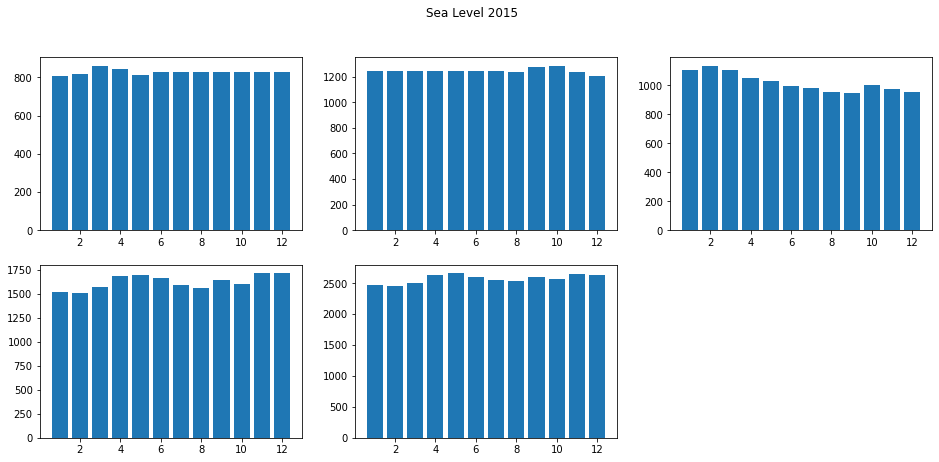

In [134]:
# Sea Level en el 2015
plt.figure(figsize=(16, 7))

plt.subplot(231)
plt.bar(df_2015['Month'].values,df_2015['d011'].values)

plt.subplot(232)
plt.bar(df_2015['Month'].values,df_2015['d013'].values)

plt.subplot(233)
plt.bar(df_2015['Month'].values,df_2015['d029'].values)

plt.subplot(234)
plt.bar(df_2015['Month'].values,df_2015['d030'].values)

plt.subplot(235)
plt.bar(df_2015['Month'].values,df_2015['d091'].values)

plt.suptitle('Sea Level 2015')
plt.show()

In [132]:
# Nivel del mar del año 1997

df_1997 = df_85_20.loc[df_85_20['Year'] == 1997]
df_1997 = df_1997[['Month','d011','d013', 'd029', 'd030', 'd091']].groupby('Month').mean()
df_1997.reset_index(inplace=True)

df_1997

,Month,d011,d013,d029,d030,d091
0,1,758.161290,1137.129032,1068.903226,1414.419355,2355.193548
1,2,709.107143,1106.678571,1123.785714,1551.392857,2458.821429
2,3,751.258065,1168.000000,1164.290323,1585.612903,2478.419355
3,4,788.400000,1099.333333,1051.600000,1593.433333,2469.166667
4,5,778.806452,1082.806452,960.709677,1734.838710,2642.129032
5,6,853.966667,1024.666667,912.666667,1702.100000,2605.600000
6,7,794.677419,1019.935484,953.774194,1728.129032,2619.709677
7,8,909.741935,1102.451613,916.806452,1599.000000,2497.290323
8,9,954.233333,1176.166667,820.933333,1614.633333,2507.733333
9,10,978.258065,1147.032258,825.838710,1750.921939,2659.483871


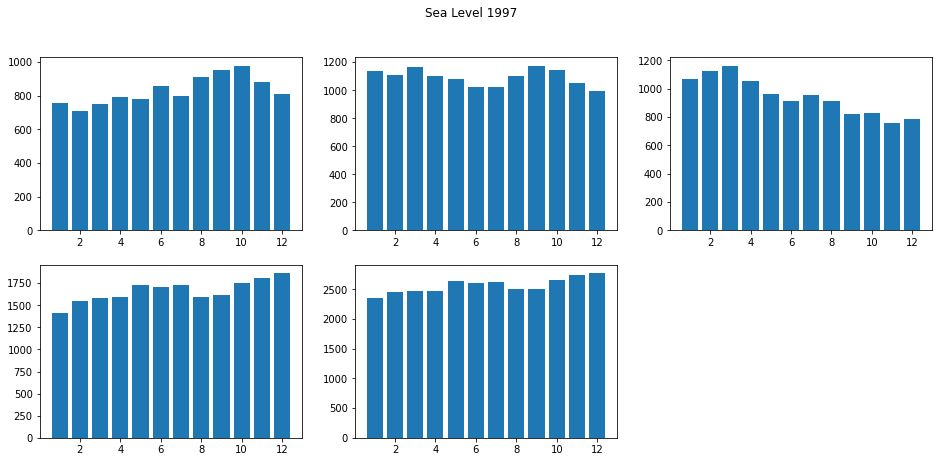

In [133]:
# Sea Level en el 2015
plt.figure(figsize=(16, 7))

plt.subplot(231)
plt.bar(df_1997['Month'].values,df_1997['d011'].values)

plt.subplot(232)
plt.bar(df_1997['Month'].values,df_1997['d013'].values)

plt.subplot(233)
plt.bar(df_1997['Month'].values,df_1997['d029'].values)

plt.subplot(234)
plt.bar(df_1997['Month'].values,df_1997['d030'].values)

plt.subplot(235)
plt.bar(df_1997['Month'].values,df_1997['d091'].values)

plt.suptitle('Sea Level 1997')
plt.show()

## 2) Relacion entre temperatura y nivel del mar

In [120]:
# Temperatura de 2015

df_sst_011 = df_sst_2015.loc[ (df_sst_2015['latitude'] == 1.5 ) & ( df_sst_2015['longitude'] == -157.5 ) ]
df_sst_013 = df_sst_2015.loc[ (df_sst_2015['latitude'] == -2.5 ) & ( df_sst_2015['longitude'] == -171.5 ) ]
df_sst_029 = df_sst_2015.loc[ (df_sst_2015['latitude'] == 1.5 ) & ( df_sst_2015['longitude'] == -154.5 ) ]
df_sst_030 = df_sst_2015.loc[ (df_sst_2015['latitude'] == -0.5 ) & ( df_sst_2015['longitude'] == -90.5 ) ]
df_sst_091 = df_sst_2015.loc[ (df_sst_2015['latitude'] == -2.5 ) & ( df_sst_2015['longitude'] == -80.5 ) ]


df_sst_011.reset_index(inplace=True, drop=True)
df_sst_011 = df_sst_011.drop([12]) #Ultima fila corresponde a enero del siguiente año

df_sst_013.reset_index(inplace=True, drop=True)
df_sst_013 = df_sst_013.drop([12])

df_sst_029.reset_index(inplace=True, drop=True)
df_sst_029 = df_sst_029.drop([12])

df_sst_030.reset_index(inplace=True, drop=True)
df_sst_030 = df_sst_030.drop([12])

df_sst_091.reset_index(inplace=True, drop=True)
df_sst_091 = df_sst_091.drop([12])


In [121]:
df_sst_091


,time,latitude,longitude,sst
0,2015-01-16 12:00:00+00:00,-2.5,-80.5,24.455790
1,2015-02-16 12:00:00+00:00,-2.5,-80.5,24.594055
2,2015-03-16 12:00:00+00:00,-2.5,-80.5,25.450155
3,2015-04-16 12:00:00+00:00,-2.5,-80.5,25.281470
4,2015-05-16 12:00:00+00:00,-2.5,-80.5,26.030365
5,2015-06-16 12:00:00+00:00,-2.5,-80.5,24.727120
6,2015-07-16 12:00:00+00:00,-2.5,-80.5,24.969143
7,2015-08-16 12:00:00+00:00,-2.5,-80.5,23.616226
8,2015-09-16 12:00:00+00:00,-2.5,-80.5,24.494907
9,2015-10-16 12:00:00+00:00,-2.5,-80.5,24.545530


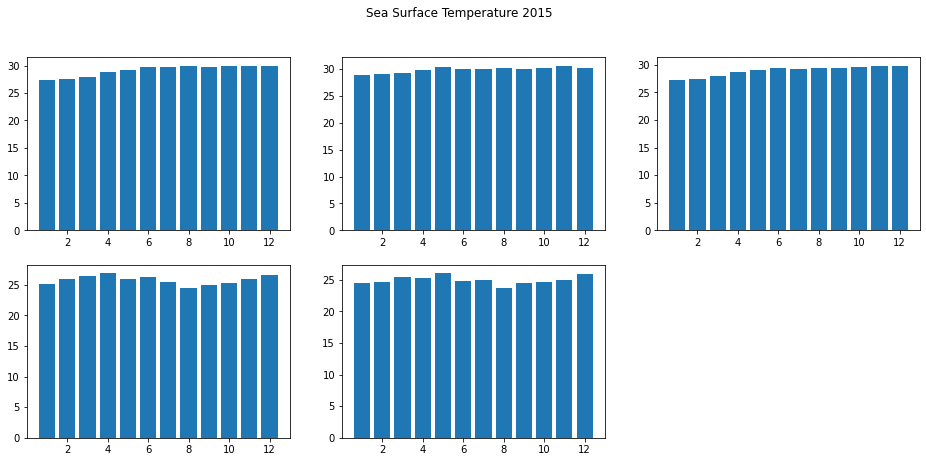

In [127]:

plt.figure(figsize=(16, 7))

plt.subplot(231)
plt.bar(df_sst_011['time'].dt.month.values ,df_sst_011['sst'])


plt.subplot(232)
plt.bar(df_sst_013['time'].dt.month.values ,df_sst_013['sst'])

plt.subplot(233)
plt.bar(df_sst_029['time'].dt.month.values ,df_sst_029['sst'])

plt.subplot(234)
plt.bar(df_sst_030['time'].dt.month.values ,df_sst_030['sst'])

plt.subplot(235)
plt.bar(df_sst_091['time'].dt.month.values ,df_sst_091['sst'])

plt.suptitle('Sea Surface Temperature 2015')
plt.show()

plt.show()

In [126]:
# Temperatura de 1997

df_sst_97_011 = df_sst_1997.loc[ (df_sst_1997['latitude'] == 1.5 ) & ( df_sst_1997['longitude'] == -157.5 ) ]
df_sst_97_013 = df_sst_1997.loc[ (df_sst_1997['latitude'] == -2.5 ) & ( df_sst_1997['longitude'] == -171.5 ) ]
df_sst_97_029 = df_sst_1997.loc[ (df_sst_1997['latitude'] == 1.5 ) & ( df_sst_1997['longitude'] == -154.5 ) ]
df_sst_97_030 = df_sst_1997.loc[ (df_sst_1997['latitude'] == -0.5 ) & ( df_sst_1997['longitude'] == -90.5 ) ]
df_sst_97_091 = df_sst_1997.loc[ (df_sst_1997['latitude'] == -2.5 ) & ( df_sst_1997['longitude'] == -80.5 ) ]


df_sst_97_011.reset_index(inplace=True, drop=True)
df_sst_97_011 = df_sst_97_011.drop([12]) #Ultima fila corresponde a enero del siguiente año

df_sst_97_013.reset_index(inplace=True, drop=True)
df_sst_97_013 = df_sst_97_013.drop([12])

df_sst_97_029.reset_index(inplace=True, drop=True)
df_sst_97_029 = df_sst_97_029.drop([12])

df_sst_97_030.reset_index(inplace=True, drop=True)
df_sst_97_030 = df_sst_97_030.drop([12])

df_sst_97_091.reset_index(inplace=True, drop=True)
df_sst_97_091 = df_sst_97_091.drop([12])


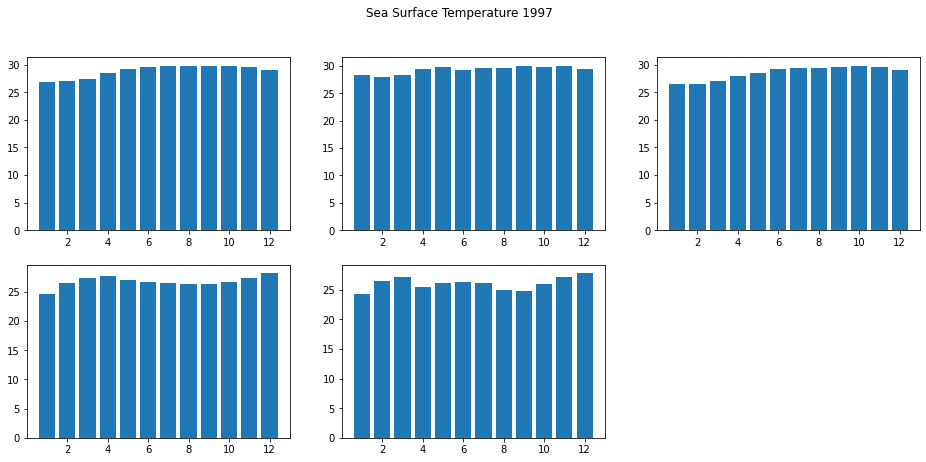

In [128]:

plt.figure(figsize=(16, 7))

plt.subplot(231)
plt.bar(df_sst_97_011['time'].dt.month.values ,df_sst_97_011['sst'])


plt.subplot(232)
plt.bar(df_sst_97_013['time'].dt.month.values ,df_sst_97_013['sst'])

plt.subplot(233)
plt.bar(df_sst_97_029['time'].dt.month.values ,df_sst_97_029['sst'])

plt.subplot(234)
plt.bar(df_sst_97_030['time'].dt.month.values ,df_sst_97_030['sst'])

plt.subplot(235)
plt.bar(df_sst_97_091['time'].dt.month.values ,df_sst_97_091['sst'])

plt.suptitle('Sea Surface Temperature 1997')
plt.show()

plt.show()